<a href="https://colab.research.google.com/github/papagorgio23/Python101/blob/master/bitcoin/Bitcoin_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

In [ ]:
import matplotlib.pyplot as plt
from time import time

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from keras.layers.recurrent import LSTM
from keras.optimizers import Adam

## Functions

In [ ]:

def prep_data(dataset):
    dataset = dataset["price_high"].values.astype("float32")
    dataset = dataset.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    return dataset, scaler


def create_dataset(dataset, look_back=60):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i : (i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    dataX = np.array(dataX)
    dataY = np.array(dataY)
    dataX = np.reshape(dataX, (dataX.shape[0], 1, dataX.shape[1]))

    return dataX, dataY


def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


def build_model(node_1=100, node_2=100, dropout_1=0.2, dropout_2=0.2):
    # initialize model
    model = Sequential()

    # first RNN LSTM layer
    model.add(LSTM(node_1, return_sequences=True))
    model.add(Dropout(dropout_1))

    # second RNN LSTM layer
    model.add(LSTM(node_2, return_sequences=False))
    model.add(Dropout(dropout_2))

    # Output layer
    model.add(Dense(1))
    model.add(Activation("linear"))

    start = time()
    model.compile(
        loss='mse',
        optimizer=Adam(learning_rate=0.01), # is this the best optimizer/learning rate?
    )
    print("compilation time : ", time() - start)

    return model

## Load/View Data

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/papagorgio23/Bitcoin/main/data/bitcoin.csv').drop(['time_period_start', 'time_period_end', 'time_open', 'time_close'], axis=1)
data.head()

,price_open,price_high,price_low,price_close,volume_traded,trades_count
0,7165.72,7165.72,7165.71,7165.71,0.021841,2
1,7168.30,7168.30,7168.30,7168.30,1.000000,2
2,7170.50,7170.50,7170.50,7170.50,0.002000,1
3,7169.20,7169.20,7169.20,7169.20,0.004000,2
4,7169.20,7169.20,7169.20,7169.20,0.002000,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price_open     10000 non-null  float64
 1   price_high     10000 non-null  float64
 2   price_low      10000 non-null  float64
 3   price_close    10000 non-null  float64
 4   volume_traded  10000 non-null  float64
 5   trades_count   10000 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 468.9 KB


In [ ]:
data.describe()

,price_open,price_high,price_low,price_close,volume_traded,trades_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7190.667163,7190.891258,7190.445922,7190.663989,0.316941,1.748300
std,18.318254,18.311377,18.356907,18.341736,1.810771,2.215815
min,7144.620000,7144.620000,7136.050000,7144.620000,0.000008,1.000000
25%,7184.950000,7185.000000,7184.757500,7184.887500,0.006210,1.000000
50%,7196.970000,7197.310000,7196.640000,7196.960000,0.015223,1.000000
75%,7203.250000,7203.400000,7203.010000,7203.250000,0.068103,2.000000
max,7223.500000,7224.530000,7223.400000,7223.500000,65.014193,88.000000


In [ ]:
data['price_high']

0       7165.72
1       7168.30
2       7170.50
3       7169.20
4       7169.20
         ...   
9995    7179.50
9996    7181.67
9997    7179.50
9998    7182.12
9999    7176.56
Name: price_high, Length: 10000, dtype: float64

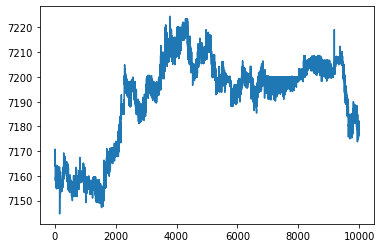

In [ ]:
plt.plot(data['price_high'])
plt.show()

# Prep Data

In [ ]:
clean_data, scaler = prep_data(data)
trainX, trainY = create_dataset(clean_data, look_back=60)

## Build RNN Model

In [ ]:
model = build_model()
start = time()
history = model.fit(
    trainX,
    trainY,
    batch_size=32,
    epochs=10,
    validation_split=0.3,
    verbose=1
)
print("\nTraining Time: ", time() - start)

compilation time :  0.009012460708618164
Epoch 1/10
218/218 [==============================] - 43s 17ms/step - loss: 0.0328 - val_loss: 7.9437e-04
Epoch 2/10
218/218 [==============================] - 2s 8ms/step - loss: 0.0032 - val_loss: 0.0041
Epoch 3/10
218/218 [==============================] - 2s 8ms/step - loss: 0.0030 - val_loss: 6.2439e-04
Epoch 4/10
218/218 [==============================] - 2s 8ms/step - loss: 0.0023 - val_loss: 8.4815e-04
Epoch 5/10
218/218 [==============================] - 2s 8ms/step - loss: 0.0021 - val_loss: 5.4626e-04
Epoch 6/10
218/218 [==============================] - 2s 8ms/step - loss: 0.0019 - val_loss: 5.3991e-04
Epoch 7/10
218/218 [==============================] - 2s 8ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 8/10
218/218 [==============================] - 2s 8ms/step - loss: 0.0016 - val_loss: 6.8117e-04
Epoch 9/10
218/218 [==============================] - 2s 8ms/step - loss: 0.0018 - val_loss: 6.7475e-04
Epoch 10/10
218/218 [========

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 100)            64400     
_________________________________________________________________
dropout (Dropout)            (None, 1, 100)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 144,901
Trainable params: 144,901
Non-trainable params: 0
__________________________________________________

## Predictions

In [ ]:
preds = model.predict(trainX)

In [ ]:
real_pred = scaler.inverse_transform(preds)
real_price = scaler.inverse_transform(trainY.reshape(-1, 1))

## Evaluate Model

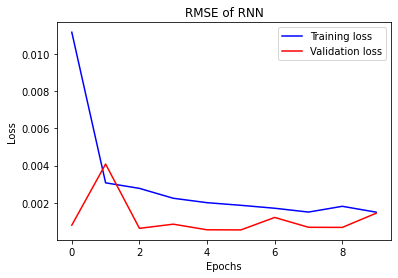

In [ ]:
visualize_loss(history, 'RMSE of RNN')

### RMSE

In [ ]:
rmse = np.sqrt(np.mean(np.square((real_price - real_pred))))
print("RMSE: ", rmse)

RMSE:  2.9157484


In [ ]:
print(real_pred[:20])

[[7160.197 ]
 [7160.625 ]
 [7160.0005]
 [7159.573 ]
 [7159.151 ]
 [7158.79  ]
 [7159.2485]
 [7159.04  ]
 [7158.6436]
 [7159.0415]
 [7158.6465]
 [7158.5083]
 [7158.3228]
 [7158.1953]
 [7158.067 ]
 [7158.6343]
 [7159.431 ]
 [7159.899 ]
 [7159.719 ]
 [7159.4966]]


In [ ]:
print(real_price[:20])

[[7163.4004]
 [7154.98  ]
 [7154.98  ]
 [7154.97  ]
 [7154.98  ]
 [7163.4004]
 [7155.78  ]
 [7155.63  ]
 [7163.4004]
 [7155.0195]
 [7156.13  ]
 [7154.84  ]
 [7156.07  ]
 [7156.07  ]
 [7163.3   ]
 [7164.22  ]
 [7163.    ]
 [7160.    ]
 [7156.08  ]
 [7156.08  ]]


### Plot Predictions vs Actual Prices

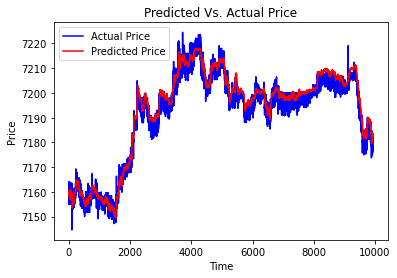

In [ ]:
times = range(len(real_pred))
plt.figure()
plt.plot(times, real_price, "b", label="Actual Price")
plt.plot(times, real_pred, "r", label="Predicted Price")
plt.title("Predicted Vs. Actual Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()